In [29]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
import numpy as np

In [30]:
results = pd.read_csv("../dataset/results.csv")
qualifying = pd.read_csv("../dataset/qualifying.csv")
qualifying_merged = pd.merge(results, qualifying, on=['raceId', 'driverId', 'constructorId'], how='inner')

In [31]:
def setStrip(n):
    if pd.isnull(n):
        return 0
    elif n < 3:
        return 1
    elif n < 6:
        return 2
    elif n < 9:
        return 3
    elif n < 12:
        return 4
    elif n < 15:
        return 5
    else: return 5

In [32]:
qualifying_merged['position_x'] = qualifying_merged['position_x'].map(setStrip)
qualifying_merged

,resultId,raceId,driverId,constructorId,number_x,grid,position_x,positionText,positionOrder,points,...,rank,fastestLapTime,fastestLapSpeed,statusId,qualifyId,number_y,position_y,q1,q2,q3
0,1,18,1,1,22.0,1,1,1,1,10.0,...,2.0,01:27.5,218.3,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,2,2,3.0,5,1,2,2,8.0,...,3.0,01:27.7,217.586,1,5,3,5,1:25.960,1:25.518,1:27.236
2,3,18,3,3,7.0,7,2,3,3,6.0,...,5.0,01:28.1,216.719,1,7,7,7,1:26.295,1:26.059,1:28.687
3,4,18,4,4,5.0,11,2,4,4,5.0,...,7.0,01:28.6,215.464,1,12,5,12,1:26.907,1:26.188,NaN
4,5,18,5,1,23.0,3,2,5,5,4.0,...,1.0,01:27.4,218.385,1,3,23,3,1:25.664,1:25.452,1:27.079
5,6,18,6,3,8.0,13,3,6,6,3.0,...,14.0,01:29.6,212.974,11,14,8,14,1:26.891,1:26.413,NaN
6,7,18,7,5,14.0,17,3,7,7,2.0,...,12.0,01:29.5,213.224,5,18,14,18,1:27.446,NaN,NaN
7,8,18,8,6,1.0,15,3,8,8,1.0,...,4.0,01:27.9,217.18,5,16,1,16,1:26.140,NaN,NaN
8,9,18,9,2,4.0,2,0,R,9,0.0,...,9.0,01:28.8,215.1,4,2,4,2,1:26.103,1:25.315,1:26.869
9,10,18,10,7,12.0,18,0,R,10,0.0,...,13.0,01:29.6,213.166,3,9,12,9,1:26.919,1:26.164,1:29.593


In [33]:
XTabl = qualifying_merged

XTabl = XTabl.drop('positionText', axis=1)
XTabl = XTabl.drop('resultId', axis=1)
XTabl = XTabl.drop('positionOrder', axis=1)
XTabl = XTabl.drop('time', axis=1)
XTabl = XTabl.drop('fastestLapTime', axis=1)
XTabl = XTabl.drop('q1', axis=1)
XTabl = XTabl.drop('q2', axis=1)
XTabl = XTabl.drop('q3', axis=1)
XTabl = XTabl.drop('milliseconds', axis=1)
XTabl = XTabl.drop('grid', axis=1)
XTabl = XTabl.drop('rank', axis=1)
XTabl = XTabl.drop('qualifyId', axis=1)
XTabl = XTabl.drop('points', axis=1)
XTabl = XTabl.drop('laps', axis=1)
XTabl = XTabl.drop('fastestLapSpeed', axis=1)
XTabl = XTabl.drop('fastestLap', axis=1)
XTabl = XTabl.drop('number_x', axis=1)

XTabl = XTabl.dropna()
YTabl = XTabl['position_x']
XTabl = XTabl.drop('position_x', axis=1)
XTabl

,raceId,driverId,constructorId,statusId,number_y,position_y
0,18,1,1,1,22,1
1,18,2,2,1,3,5
2,18,3,3,1,7,7
3,18,4,4,1,5,12
4,18,5,1,1,23,3
5,18,6,3,11,8,14
6,18,7,5,5,14,18
7,18,8,6,5,1,16
8,18,9,2,4,4,2
9,18,10,7,3,12,9


In [34]:
x_raw_, y_raw = XTabl.values, YTabl.values

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(x_raw_, y_raw, test_size=0.15, random_state=40)

In [36]:
clf = RandomForestClassifier(100, min_samples_split=20)
clf.fit(X_train, Y_train)
Y_test_hat = clf.predict(X_test)
Y_train_hat = clf.predict(X_train)
Y_test_hat = np.rint(Y_test_hat)
Y_train_hat = np.rint(Y_train_hat)

In [37]:
metrics.accuracy_score(Y_test, Y_test_hat)

0.6758436944937833

In [38]:
import matplotlib.pyplot as plt

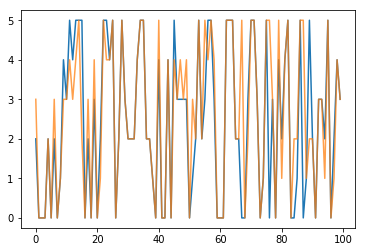

In [41]:
plt.plot(Y_test_hat[:100])
plt.plot(Y_test[:100], alpha=0.75)

In [39]:
metrics.accuracy_score(Y_train, Y_train_hat)

0.7836990595611285

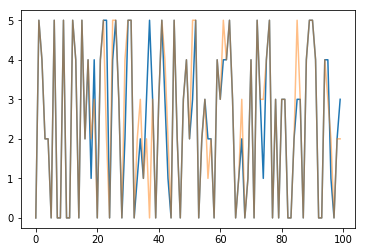

In [40]:
plt.plot(Y_train[:100])
plt.plot(Y_train_hat[:100], alpha=0.5)